In [ ]:
# Install libraries
! pip install facenet_pytorch

In [1]:
# Import libraries
from google.colab import drive
drive.mount('/content/drive')

import os
import sys
import numpy as np

import torch
import torchvision

Mounted at /content/drive


### Import data

In [2]:
root_dir = '/content/drive/MyDrive/Deep_learning_course/Project/'
project_dir = os.path.join(root_dir, 'FastRCNN/')

In [3]:
lib_dir = os.path.join(project_dir, 'src')
sys.path.append(lib_dir)
from dataset import FastrcnnDataset
from models import get_facenet, get_fasterrcnn
from pipeline import Pipeline

In [4]:
# Import data
path_to_drive_data = os.path.join(root_dir, 'data/')
path_to_zip = os.path.join(path_to_drive_data, 'Archive_classification.zip')
current_folder_path = '/content/localdata/'
!unzip -q $path_to_zip -d $current_folder_path

In [5]:
indicator_name = 'face_data.csv'
indicator_path = os.path.join(project_dir, 'data', 'test', indicator_name)
indicator_local = os.path.join(current_folder_path, indicator_name)
!cp -r $indicator_path $indicator_local

In [6]:
# parameter
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 3
model_fasterrcnn_load_name = 'fastrcnn.pkl'
model_path = os.path.join(root_dir, "models", model_fasterrcnn_load_name)

### Instantiate models

In [7]:
model_fasterrcnn = get_fasterrcnn(num_classes)
state = torch.load(os.path.join(project_dir, 'models', 'fastrcnn_1.pkl'), map_location=torch.device('cpu'))
model_fasterrcnn.load_state_dict(state)
model_fasterrcnn = model_fasterrcnn.to(device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 137MB/s]


In [8]:
model_facenet = get_facenet()
model_facenet = model_facenet.to(device)

  0%|          | 0.00/107M [00:00<?, ?B/s]

### Check results on test set

In [9]:
dataset = FastrcnnDataset(
    root=current_folder_path,
    subdir="Archive_joint"
)

In [10]:
pipeline = Pipeline(
  model_fasterrcnn,
    model_facenet,
    device
)

/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


Predictions: woman: 0.926


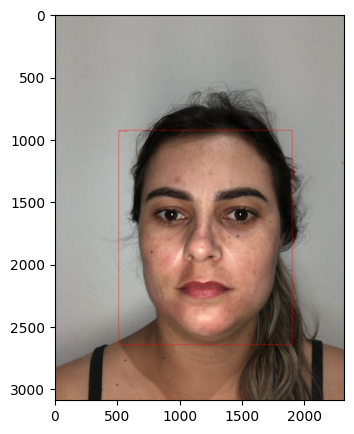

In [11]:
k = 2
embedding = pipeline.run_pipe(dataset.data[k][0])

Predictions: woman: 0.926


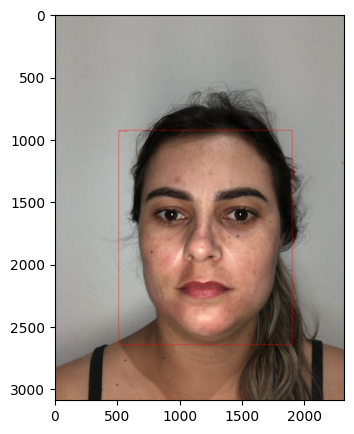

In [13]:
k = 2
embedding_2 = pipeline.run_pipe(dataset.data[k][0])

Predictions: man: 0.971


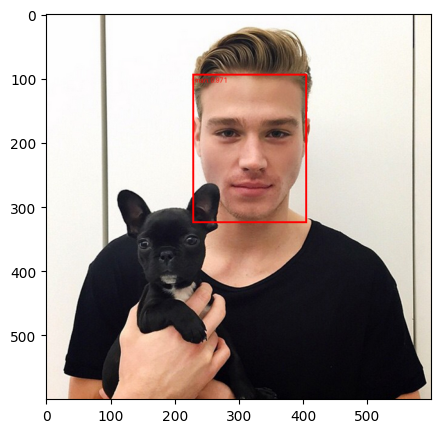

In [12]:
k = 256
embedding_3 = pipeline.run_pipe(dataset.data[k][0])

In [14]:
(embedding - embedding_2).norm()

tensor(0., device='cuda:0')

In [15]:
(embedding - embedding_3).norm()

tensor(0.7147, device='cuda:0')

### Check results on my data

In [21]:
me_files = os.listdir("/content/MyData/")

/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


Predictions: man: 0.880


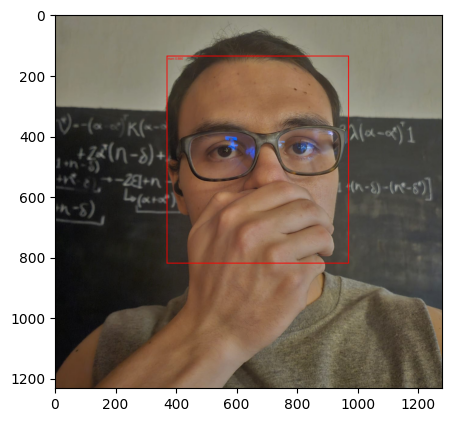

In [23]:
embedding_me_1 = pipeline.run_pipe(os.path.join("/content/MyData/", me_files[0]))

/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


Predictions: man: 0.857


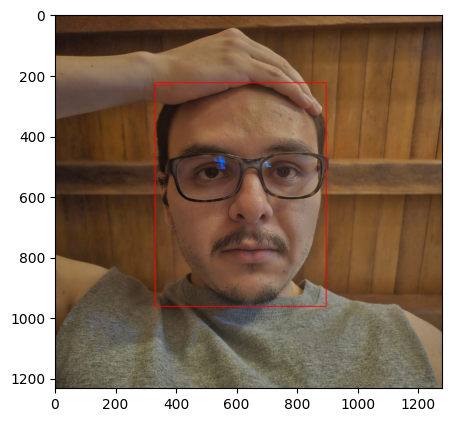

In [24]:
embedding_me_2 = pipeline.run_pipe(os.path.join("/content/MyData/", me_files[1]))

/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


Predictions: man: 0.950


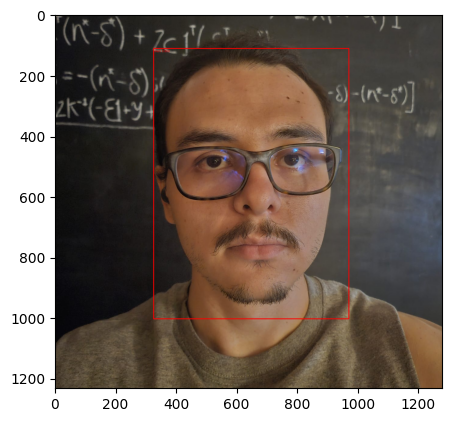

In [25]:
embedding_me_3 = pipeline.run_pipe(os.path.join("/content/MyData/", me_files[2]))

/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


Predictions: man: 0.909


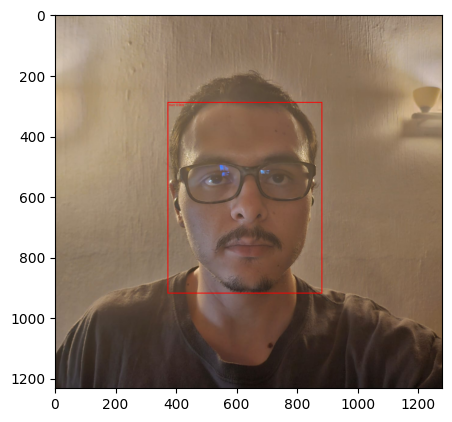

In [26]:
embedding_me_4 = pipeline.run_pipe(os.path.join("/content/MyData/", me_files[3]))

#### Me against me

In [27]:
(embedding_me_1 - embedding_me_2).norm()

tensor(0.3307, device='cuda:0')

In [28]:
(embedding_me_1 - embedding_me_3).norm()

tensor(0.1698, device='cuda:0')

In [29]:
(embedding_me_1 - embedding_me_4).norm()

tensor(0.2267, device='cuda:0')

#### Me against others

In [30]:
(embedding_me_1 - embedding_3).norm()

tensor(0.4919, device='cuda:0')

In [32]:
(embedding_me_1 - embedding_2).norm()

tensor(0.5036, device='cuda:0')